In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:


try:
    # Attempt to read the CSV file
    df = pd.read_csv('Corona.csv')
    print("CSV file loaded successfully!")
    print(df.head())  # Display first 5 rows

except FileNotFoundError:
    print("❌ Error: The file was not found. Please check the filename or path.")

except pd.errors.EmptyDataError:
    print("❌ Error: The file is empty.")

except pd.errors.ParserError:
    print("❌ Error: The file could not be parsed (check formatting).")

except Exception as e:
    print(f"❌ An unexpected error occurred: {e}")

finally:
    print("✅ File read attempt completed.")


CSV file loaded successfully!
       country continent  total_confirmed  total_deaths  total_recovered  \
0  Afghanistan      Asia           179267        7690.0         162202.0   
1      Albania    Europe           275574        3497.0         271826.0   
2      Algeria    Africa           265816        6875.0         178371.0   
3      Andorra    Europe            42156         153.0          41021.0   
4       Angola    Africa            99194        1900.0          97149.0   

   active_cases  serious_or_critical  total_cases_per_1m_population  \
0        9375.0               1124.0                           4420   
1         251.0                  2.0                          95954   
2       80570.0                  6.0                           5865   
3         982.0                 14.0                         543983   
4         145.0                  NaN                           2853   

   total_deaths_per_1m_population  total_tests  total_tests_per_1m_population  \
0    

In [7]:
df.fillna(0)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945
2,Algeria,Africa,265816,6875.0,178371.0,80570.0,6.0,5865,152.0,230861.0,5093.0,45325517
3,Andorra,Europe,42156,153.0,41021.0,982.0,14.0,543983,1974.0,249838.0,3223924.0,77495
4,Angola,Africa,99194,1900.0,97149.0,145.0,0.0,2853,55.0,1499795.0,43136.0,34769277
...,...,...,...,...,...,...,...,...,...,...,...,...
221,Wallis And Futuna Islands,Australia/Oceania,454,7.0,438.0,9.0,0.0,41755,644.0,20508.0,1886140.0,10873
222,Western Sahara,Africa,10,1.0,9.0,0.0,0.0,16,2.0,0.0,0.0,624681
223,Yemen,Asia,11819,2149.0,9009.0,661.0,23.0,381,69.0,265253.0,8543.0,31049015
224,Zambia,Africa,320591,3983.0,315997.0,611.0,0.0,16575,206.0,3452554.0,178497.0,19342381


In [8]:
df.columns

Index(['country', 'continent', 'total_confirmed', 'total_deaths',
       'total_recovered', 'active_cases', 'serious_or_critical',
       'total_cases_per_1m_population', 'total_deaths_per_1m_population',
       'total_tests', 'total_tests_per_1m_population', 'population'],
      dtype='object')

In [9]:
df.isnull().sum()

country                            0
continent                          0
total_confirmed                    0
total_deaths                       8
total_recovered                   22
active_cases                      22
serious_or_critical               81
total_cases_per_1m_population      0
total_deaths_per_1m_population     8
total_tests                       14
total_tests_per_1m_population     14
population                         0
dtype: int64

In [10]:
df.describe()

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
count,2.260000e+02,2.180000e+02,2.040000e+02,2.040000e+02,145.000000,226.000000,218.000000,2.120000e+02,2.120000e+02,2.260000e+02
mean,2.305651e+06,2.884442e+04,2.256851e+06,6.861029e+04,269.482759,148156.809735,1157.550459,2.987445e+07,1.944650e+06,3.495521e+07
std,7.575510e+06,9.971254e+04,7.613357e+06,2.350430e+05,883.174727,155202.909225,1212.833590,1.079635e+08,3.318400e+06,1.390338e+08
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000,16.000000,2.000000,5.117000e+03,5.093000e+03,8.050000e+02
25%,2.412600e+04,2.370000e+02,1.619300e+04,2.397500e+02,5.000000,11748.250000,172.500000,3.472968e+05,1.667260e+05,5.605125e+05
50%,1.793750e+05,2.251500e+03,1.372740e+05,1.634000e+03,17.000000,98271.500000,768.000000,2.238918e+06,7.753355e+05,5.800570e+06
75%,1.090902e+06,1.400650e+04,1.006245e+06,1.929675e+04,139.000000,255632.750000,1850.000000,1.233862e+07,2.267408e+06,2.187284e+07
max,8.420947e+07,1.026646e+06,8.124426e+07,1.938567e+06,8318.000000,704302.000000,6297.000000,1.016883e+09,2.184247e+07,1.439324e+09


In [11]:
df.groupby("continent").agg({"total_confirmed" : "sum", "total_deaths" : "sum"})

,total_confirmed,total_deaths
continent,,
Africa,12042400,254319.0
Asia,149999659,1427939.0
Australia/Oceania,7942867,11413.0
Europe,194330079,1830655.0
North America,99625662,1467234.0
South America,57136485,1296523.0


In [29]:
deathrate= df["total_deaths"].sum()/ df["total_confirmed"].sum()
print(deathrate)

0.012067470192974418


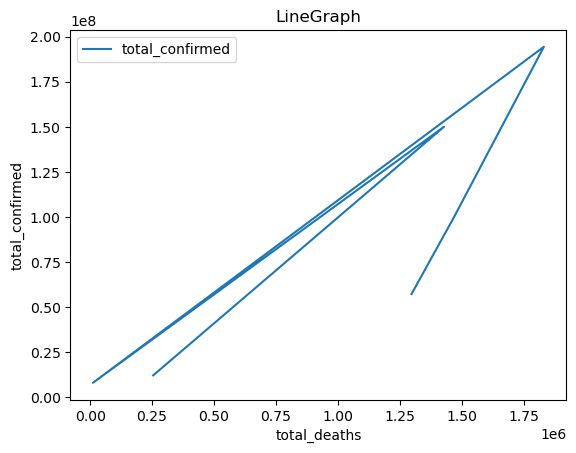

In [12]:
df.groupby("continent").agg({"total_confirmed" : "sum", "total_deaths" : "sum"}).plot(x= "total_deaths",y = "total_confirmed")
plt.title("LineGraph")
plt.xlabel("total_deaths")
plt.ylabel("total_confirmed")
plt.show()


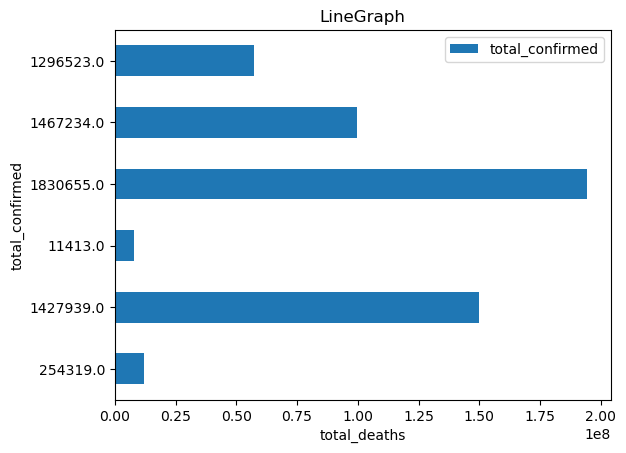

In [13]:
df.groupby("continent").agg({"total_confirmed":"sum", "total_deaths":"sum"}).plot(x= "total_deaths",y = "total_confirmed",kind ="barh")
plt.title("LineGraph")
plt.xlabel("total_deaths")
plt.ylabel("total_confirmed")
plt.show()

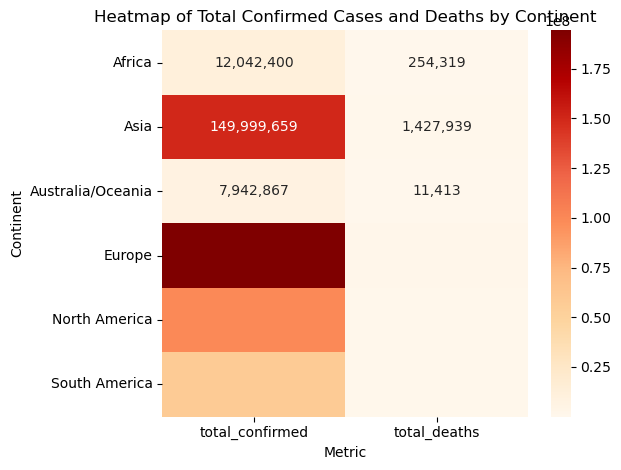

In [17]:
grouped= df.groupby("continent").agg({"total_confirmed" : "sum", "total_deaths" : "sum"})
sns.heatmap(grouped,annot=True, cmap="OrRd", fmt=",.0f")
plt.title("Heatmap of Total Confirmed Cases and Deaths by Continent")
plt.xlabel("Metric")
plt.ylabel("Continent")
plt.tight_layout()
plt.show()

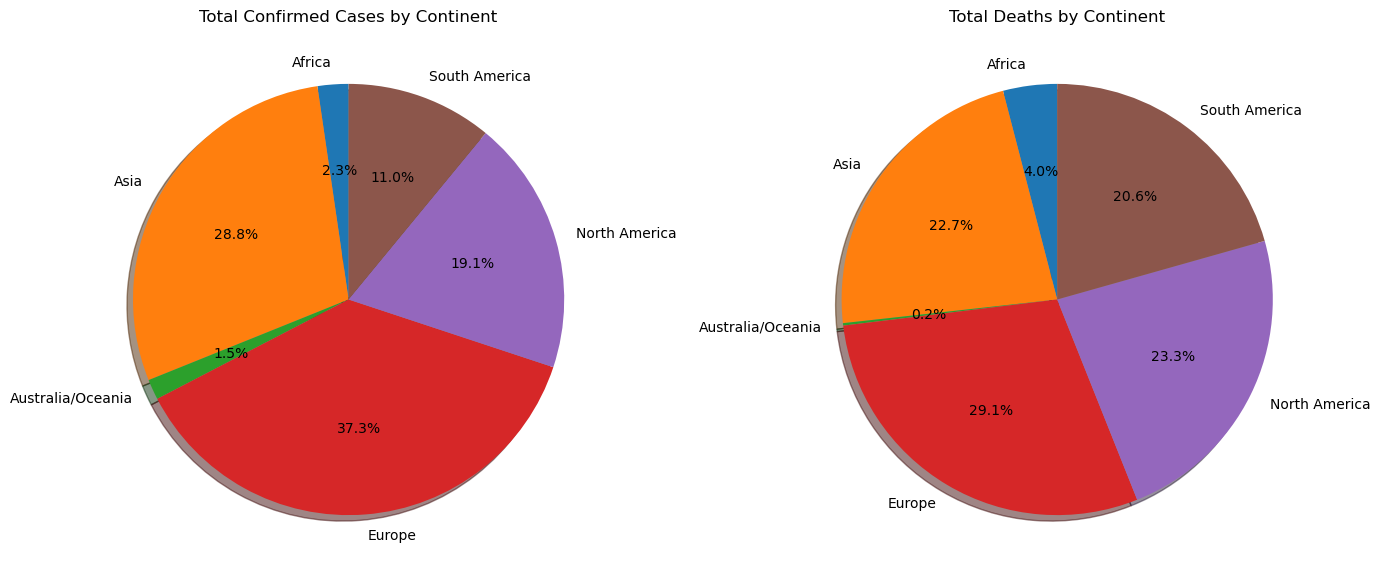

In [18]:

grouped = df.groupby("continent").agg({
    "total_confirmed": "sum",
    "total_deaths": "sum"
})

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for total confirmed cases
grouped["total_confirmed"].plot(
    kind='pie',
    ax=axes[0],
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    legend=False
)
axes[0].set_title("Total Confirmed Cases by Continent")
axes[0].set_ylabel('')  # Remove y-label for cleaner look

# Pie chart for total deaths
grouped["total_deaths"].plot(
    kind='pie',
    ax=axes[1],
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    legend=False
)
axes[1].set_title("Total Deaths by Continent")
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


In [ ]:
Analysis
-Europe had the highest cases number of cases with a percentage of 37.3% while Australia had the list number of cases
-North America had the second highest number of deaths even if its confirmed cases were no that high which may be interpeated like the population did not get vaccination earlier or had weak imune system
-Australia both the cases confired and deaths are relatively low which maybe attributed to good caution methods/ .